In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("C:/Users/Arjun Pandit/Desktop/data_set/loan_dataset.csv")

In [5]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
df=df.drop('loan_id',axis=1)

In [8]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:
for col in ['education', 'self_employed', 'loan_status']:
    print(f"{col}: {df[col].unique()}")

education: [' Graduate' ' Not Graduate']
self_employed: [' No' ' Yes']
loan_status: [' Approved' ' Rejected']


In [10]:
df['loan_status'].value_counts(normalize=True)

loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64

In [11]:
pd.crosstab(df['education'], df['loan_status'], normalize='index')

loan_status,Approved,Rejected
education,,
Graduate,0.624534,0.375466
Not Graduate,0.619765,0.380235


In [12]:
pd.crosstab(df['self_employed'], df['loan_status'], normalize='index')

loan_status,Approved,Rejected
self_employed,,
No,0.621992,0.378008
Yes,0.622326,0.377674


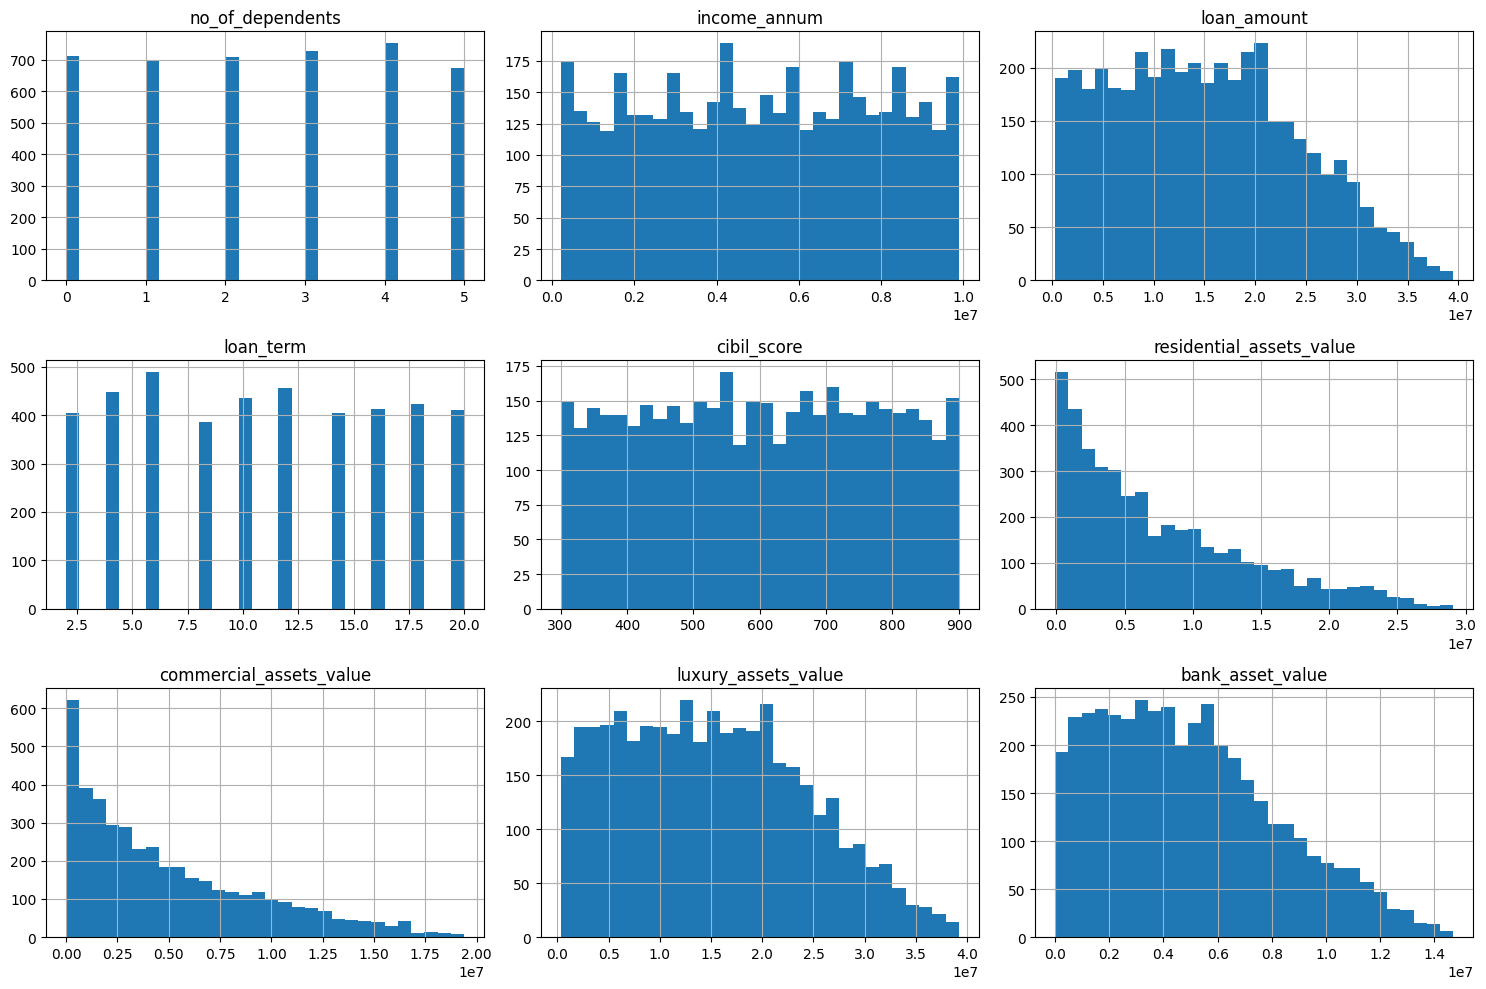

In [13]:
# histogram with value counts
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

<Axes: >

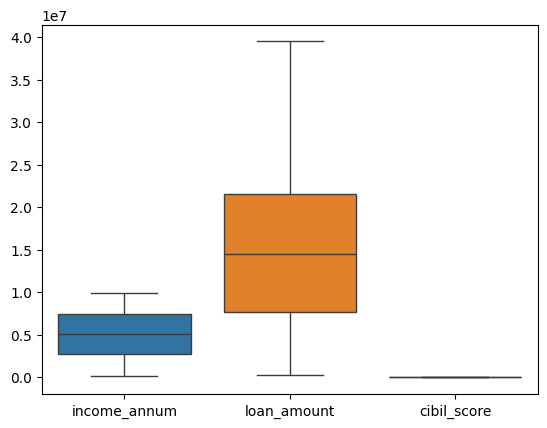

In [14]:
sns.boxplot(data=df[['income_annum', 'loan_amount', 'cibil_score']])

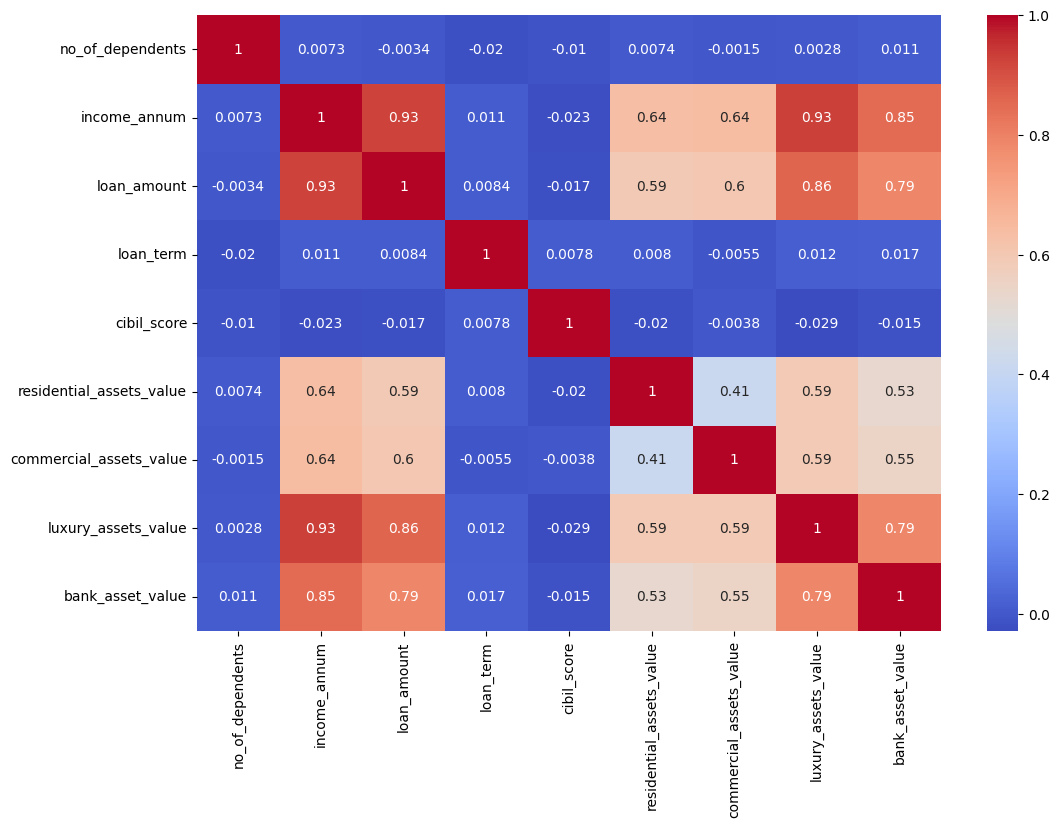

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

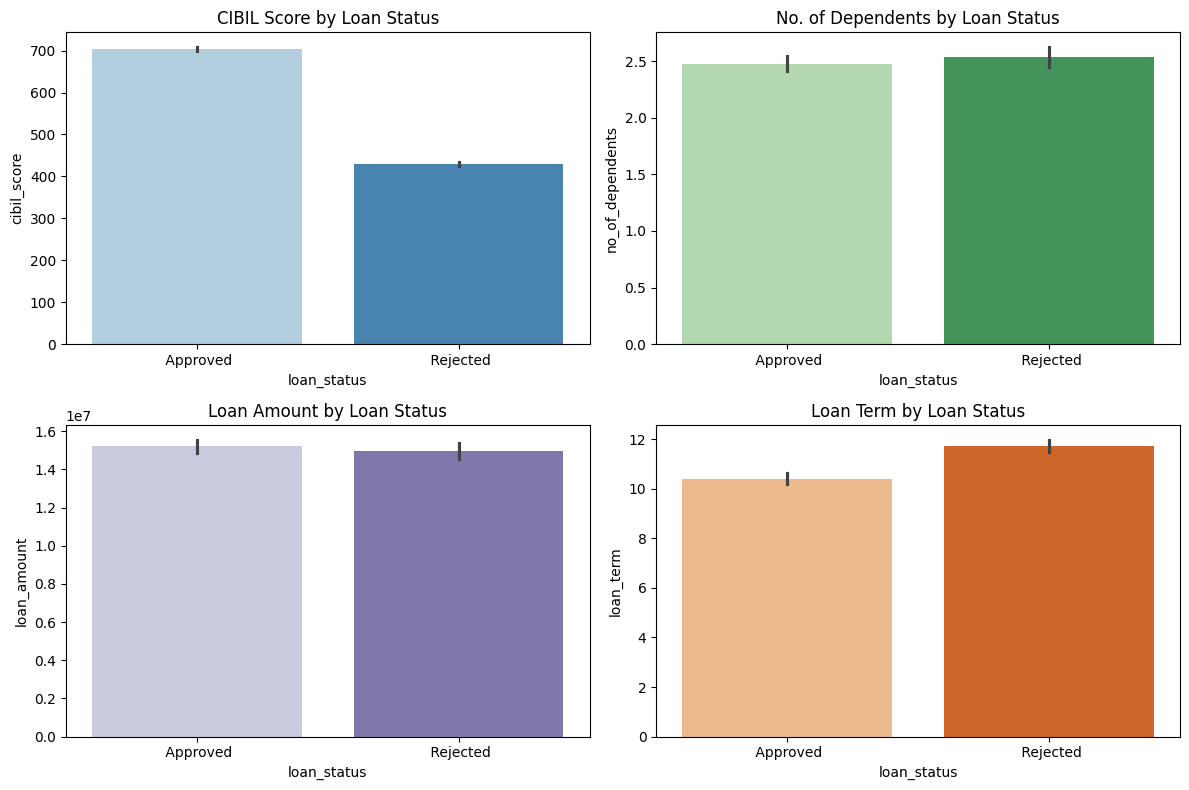

In [16]:
plt.figure(figsize=(12, 8))

# Plot 1: CIBIL Score vs Loan Status
plt.subplot(2, 2, 1)
sns.barplot(data=df, x="loan_status", y="cibil_score", hue="loan_status", palette="Blues", legend=False)
plt.title("CIBIL Score by Loan Status")

# Plot 2: No of Dependents vs Loan Status
plt.subplot(2, 2, 2)
sns.barplot(data=df, x="loan_status", y="no_of_dependents", hue="loan_status", palette="Greens", legend=False)
plt.title("No. of Dependents by Loan Status")

# Plot 3: Loan Amount vs Loan Status
plt.subplot(2, 2, 3)
sns.barplot(data=df, x="loan_status", y="loan_amount", hue="loan_status", palette="Purples", legend=False)
plt.title("Loan Amount by Loan Status")

# Plot 4: Loan Term vs Loan Status
plt.subplot(2, 2, 4)
sns.barplot(data=df, x="loan_status", y="loan_term", hue="loan_status", palette="Oranges", legend=False)
plt.title("Loan Term by Loan Status")

plt.tight_layout()
plt.show()


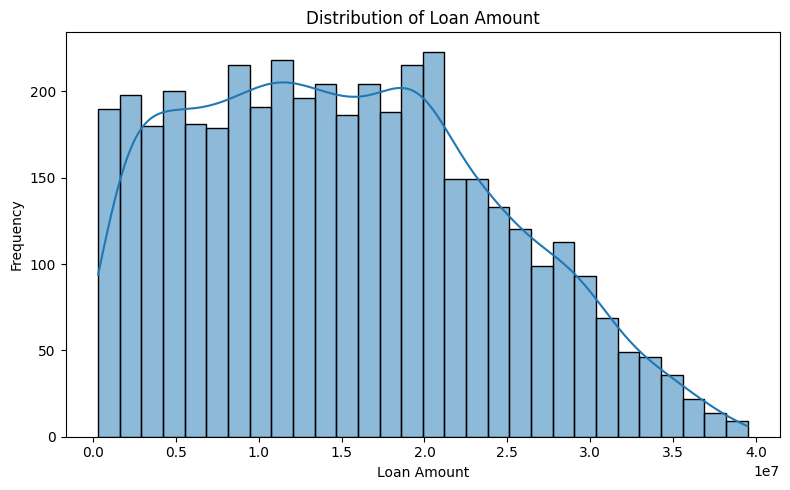

In [17]:
# Univariate Analysis: Distribution of Loan Amount
plt.figure(figsize=(8, 5))
sns.histplot(df['loan_amount'], bins=30, kde=True)
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [18]:
df.loc[(df["cibil_score"]> 740 ) & (df["loan_status"] == "Rejected")]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


In [19]:
df.loc[(df["cibil_score"] > 740) & 
         (df["no_of_dependents"] >1)]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
15,5,Not Graduate,No,4700000,10700000,10,794,5700000,3900000,16400000,4400000,Approved
17,4,Not Graduate,Yes,2900000,9400000,14,780,2900000,2800000,6700000,4300000,Approved
29,3,Not Graduate,Yes,9000000,31500000,10,850,21800000,12400000,33700000,8000000,Approved
33,5,Not Graduate,Yes,8400000,22000000,2,830,3800000,3900000,19900000,5400000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...
4247,3,Not Graduate,No,3100000,9800000,12,820,6400000,5200000,10900000,4400000,Approved
4249,4,Graduate,No,1100000,4000000,14,887,2400000,1500000,4200000,1600000,Approved
4253,5,Graduate,Yes,7000000,26200000,12,896,13100000,6600000,23600000,5700000,Approved
4261,3,Graduate,Yes,3000000,7500000,6,881,1400000,4500000,6100000,2300000,Approved


In [20]:
df.loc[(df["no_of_dependents"] == 1) & 
(df["loan_status"] == "Rejected") & 
(df[ 'cibil_score'] > 740)]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


In [21]:
def encoder(text):
    if text.strip()=='Approved':
        return 1
    else:
        return 0

def encoder1(text):
    if text.strip()=='Graduate':
        return 1
    else:
        return 0

def encoder2(text):
    if text.strip()=='Yes':
        return 1
    else:
        return 0

In [22]:
df['loan_status']=df['loan_status'].apply(encoder)
df['education']=df['education'].apply(encoder1)
df['self_employed']=df['self_employed'].apply(encoder2)

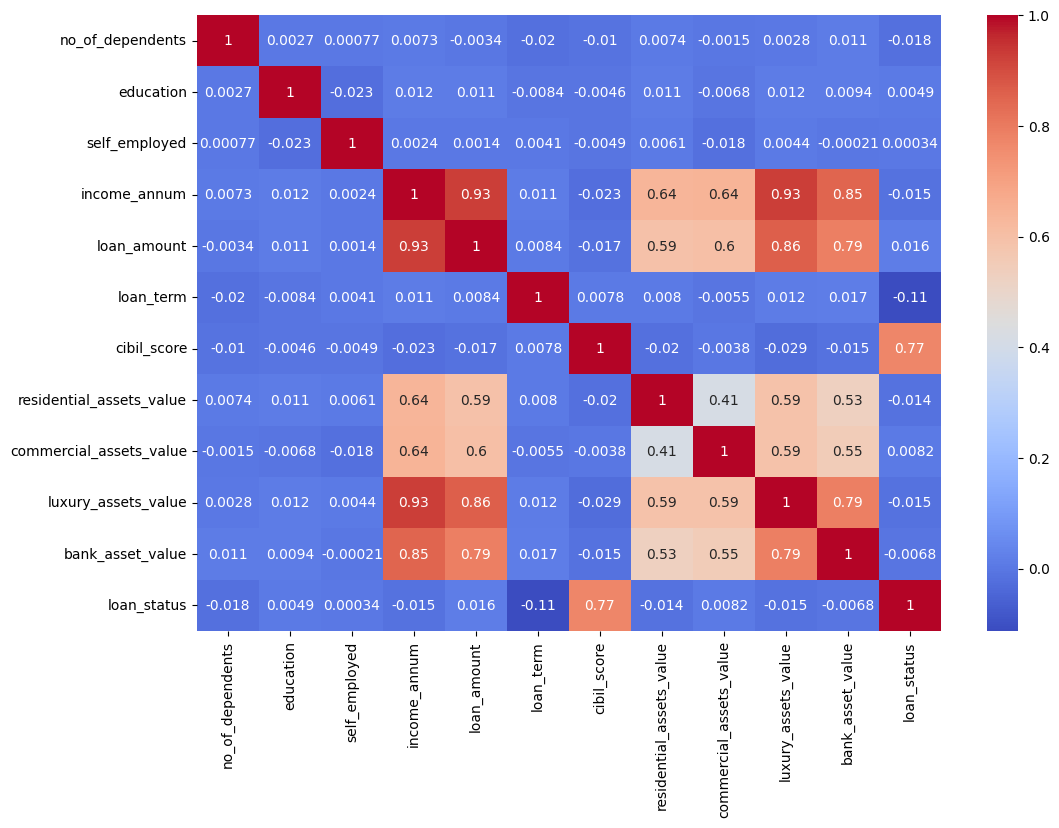

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [24]:
def column_transfor(col1,col2,col3,col4,df):
    df['total_assets_lakh']=df[col1]+df[col2]+df[col3]+df[col4]
    df['total_assets_lakh']=(df['total_assets_lakh']/100000).round(3)

In [25]:
column_transfor('residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value',df)

In [26]:
df['income_annual_lakh']=(df['income_annum']/100000).round(3)

In [27]:
df['loan_amount_lakh']=(df['loan_amount']/100000).round(3)

In [28]:
df['loan_amount_lakh'].max()

np.float64(395.0)

In [29]:
df=df.drop(['income_annum','loan_amount','luxury_assets_value','commercial_assets_value','bank_asset_value','residential_assets_value'],axis=1)

In [30]:
X=df.drop('loan_status',axis=1)

In [31]:
y=df['loan_status']

In [32]:
from scipy.stats import skew
skewness = X.select_dtypes(include=['float64', 'int64']).apply(skew)

print(skewness)

# Optionally: See which ones are highly skewed
high_skew = skewness[abs(skewness) > 0.5]
print("Highly skewed columns:\n", high_skew)


no_of_dependents     -0.017964
education            -0.008901
self_employed        -0.014524
loan_term             0.036346
cibil_score          -0.009036
total_assets_lakh     0.297137
income_annual_lakh   -0.012810
loan_amount_lakh      0.308615
dtype: float64
Highly skewed columns:
 Series([], dtype: float64)


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train = X_train[['loan_term', 'cibil_score', 'total_assets_lakh', 'income_annual_lakh', 'loan_amount_lakh']]
X_test = X_test[['loan_term', 'cibil_score', 'total_assets_lakh', 'income_annual_lakh', 'loan_amount_lakh']]



In [35]:
# from sklearn.preprocessing import MinMaxScaler

In [36]:
# scaler = MinMaxScaler()

In [37]:
# standar_data = scaler.fit_transform(X_train)
# X_train = pd.DataFrame(standar_data,columns = X_train.columns)

In [38]:
# standar_test = scaler.transform(X_test)
# X_test = pd.DataFrame(standar_test,columns = X_test.columns)

In [39]:
# X_train.sample(5)

In [40]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression

def run_efs(X, y, max_features=5, scoring='accuracy', cv=5):
    """
    Run Exhaustive Feature Selection on Logistic Regression and print results.

    Parameters:
    - X: Feature DataFrame
    - y: Target Series
    - max_features: Max number of features to test
    - scoring: Scoring metric (default = 'accuracy')
    - cv: Number of cross-validation folds

    Returns:
    - efs: Fitted EFS object
    """
    print('\n')
    print(f"🔍 Running EFS with max_features = {max_features}, scoring = '{scoring}', cv = {cv}...")

    model = LogisticRegression()
    efs = EFS(model,
              max_features=max_features,
              scoring=scoring,
              cv=cv)

    efs = efs.fit(X, y)

    print("\n✅ Best Score:", efs.best_score_)
    print("🏆 Best Feature Combo:", efs.best_feature_names_)
    print(f"📦 Total Combinations Evaluated: {len(efs.subsets_)}")

    return efs


In [41]:
# for i in range(1,9):
#     run_efs(X_train,y_train,max_features=i)

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [43]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),                      # Step 1: scale features
    ('classifier', LogisticRegression(class_weight='balanced'))               #step 2: define the model
])

In [44]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [45]:
y_pred = pipeline.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9121779859484778


In [ ]:
# Access the LogisticRegression model inside the pipeline
logreg_model = pipeline.named_steps['classifier']

# Get the coefficients and intercept
coefficients = logreg_model.coef_[0]
intercept = logreg_model.intercept_[0]

# Match them with the feature names
selected_features = ['loan_term', 'cibil_score', 'total_assets_lakh', 'income_annual_lakh', 'loan_amount_lakh']
for feat, coef in zip(selected_features, coefficients):
    print(f"{feat}: {coef:.4f}")

print(f"Intercept: {intercept:.4f}")


cibil_score: -1.9396
income_annual_lakh: 12.1426
loan_amount_lakh: 0.3936
Intercept: -4.1341


In [48]:
import pickle
# Saving the model to a file
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.94      0.89       318
           1       0.96      0.90      0.93       536

    accuracy                           0.91       854
   macro avg       0.90      0.92      0.91       854
weighted avg       0.92      0.91      0.91       854

